# Imports

In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import make_classification, make_regression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# SVM (from scratch)

In [41]:
X, y = make_classification(n_samples=1000, n_features=2, n_informative=2, n_redundant=0,
                           n_clusters_per_class=1, class_sep=3., random_state=12)

In [42]:
X.shape, y.shape

((1000, 2), (1000,))

(998, 2) (998,)


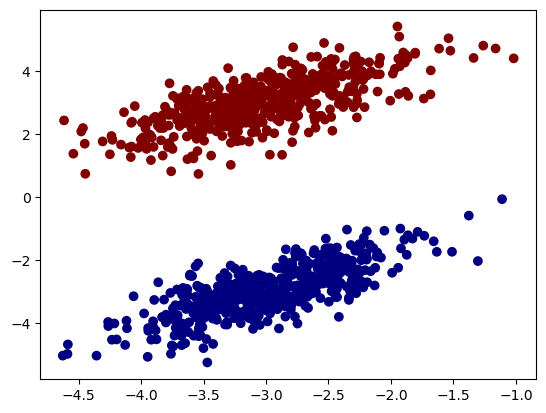

In [43]:
flags = np.ones((1000), dtype=np.bool_)
flags[[154, 770]] = False
X = X[flags, :]
y = y[flags]
print(X.shape, y.shape)
y = np.where(y==0, -1, y)[:, None]

plt.scatter(X[:, 0], X[:, 1], c=y, cmap='jet');

In [44]:
class SVM:
    
    def __init__(self, in_features, n_iter=1000, eta=0.01, c=1., random_state=42):
        self.w = np.random.randn(in_features, 1)
        self.b = np.random.randn()
        self.n_iter = n_iter
        self.eta = eta
        self.c = c
        self.loss_hist = []
        
    def fit(self, X, y):
        for i in range(self.n_iter):
            y_hat = self.predict(X)
            mask = np.squeeze((1 - y*y_hat) > 0)
            if mask.sum() == 0:
                print(i, 'break!')
                break
            loss = self._loss(y, y_hat, mask)
            grad_w, grad_b = self._grad(X, y, y_hat, mask)
            self.w -= self.eta * grad_w
            self.b -= self.eta * grad_b
            self.loss_hist.append(loss)
            
    def predict(self, x):
        return x @ self.w + self.b
    
    def score(self, X, y):
        y_hat = self.predict(X)
        return self._accuracy(y, y_hat, t=0)
    
    def _accuracy(self, y, y_hat, t=0):
        y_hat = np.where(y_hat<t, -1, 1)
        acc = np.sum(y == y_hat) / len(y)
        return acc
    
    def _loss(self, y, y_hat, mask):
        y_mask = y[mask]
        y_hat_mask = y_hat[mask]
        return np.maximum(0, 1-y_mask*y_hat_mask).mean()
    
    def _grad(self, x, y, y_hat, mask):
        x_mask = x[mask]
        y_mask = y[mask]
        grad_w = (-y_mask*x_mask).mean(axis=0).reshape(self.w.shape) + self.c*self.w
        grad_b = (-y_mask).mean(axis=0)
        return grad_w, grad_b

In [45]:
model = SVM(in_features=2, n_iter=2000, eta=0.01, c=1., random_state=2)
model.fit(X, y)

1083 break!


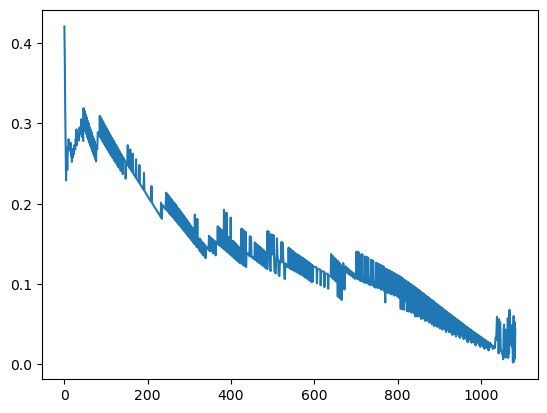

In [46]:
plt.plot(model.loss_hist)

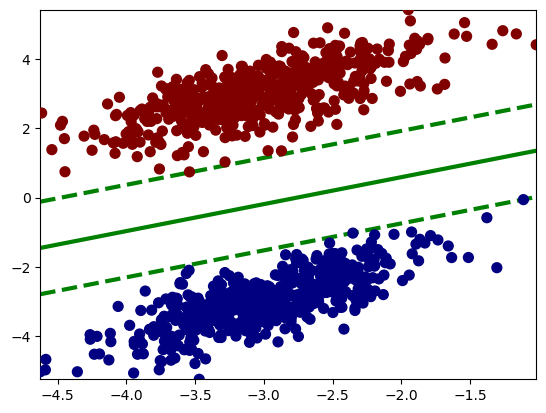

In [47]:
n = 1000
xmin, xmax = X.min(0), X.max(0)
x1r = np.linspace(xmin[0], xmax[0], n)
x2r = np.linspace(xmin[1], xmax[1], n)
x1m, x2m = np.meshgrid(x1r, x2r)

Xm = np.stack((x1m.flatten(), x2m.flatten()), axis=1)
ym = model.predict(Xm)
ym = ym.reshape(x1m.shape)

plt.contour(x1m, x2m, ym, levels=[-1, 0, 1], linestyles=['--', '-', '--'], linewidths=3, colors='green')

plt.scatter(X[:, 0], X[:, 1], c=y, cmap='jet', s=50, zorder=3)

In [48]:
model = SVM(in_features=2, n_iter=2000, eta=0.01, c=5., random_state=2)
model.fit(X, y)

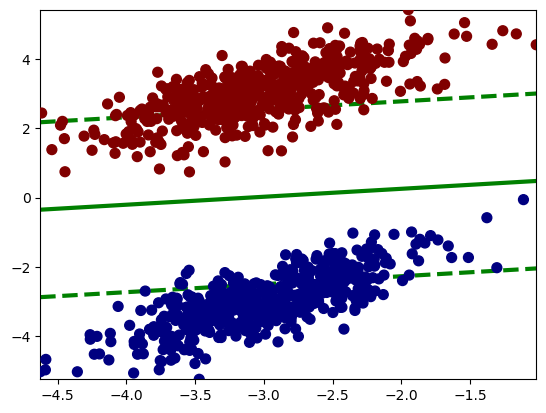

In [49]:
n = 1000
xmin, xmax = X.min(0), X.max(0)
x1r = np.linspace(xmin[0], xmax[0], n)
x2r = np.linspace(xmin[1], xmax[1], n)
x1m, x2m = np.meshgrid(x1r, x2r)

Xm = np.stack((x1m.flatten(), x2m.flatten()), axis=1)
ym = model.predict(Xm)
ym = ym.reshape(x1m.shape)

plt.contour(x1m, x2m, ym, levels=[-1, 0, 1], linestyles=['--', '-', '--'], linewidths=3, colors='green')

plt.scatter(X[:, 0], X[:, 1], c=y, cmap='jet', s=50, zorder=3)

# **SVM (sklearn)**

### **Linear SVC**

In [50]:
from sklearn.svm import LinearSVC, SVC, NuSVC

In [51]:
X, y = make_classification(n_samples=1000, n_features=2, n_informative=2, n_redundant=0,
                           n_clusters_per_class=1, class_sep=3., random_state=12)

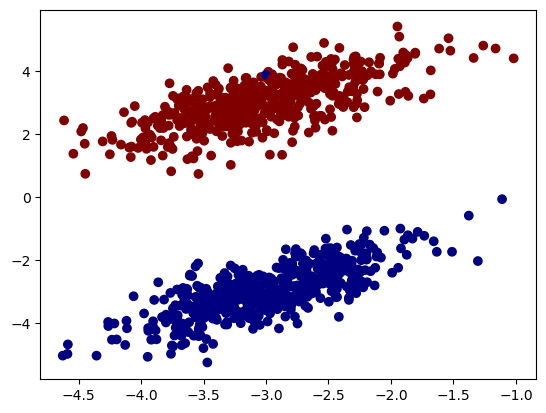

In [52]:
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='jet');

In [53]:
model = LinearSVC(loss='hinge', C=.9, max_iter=2000)
model.fit(X, y)

D:\anaconda\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


LinearSVC(C=0.9, loss='hinge', max_iter=2000)

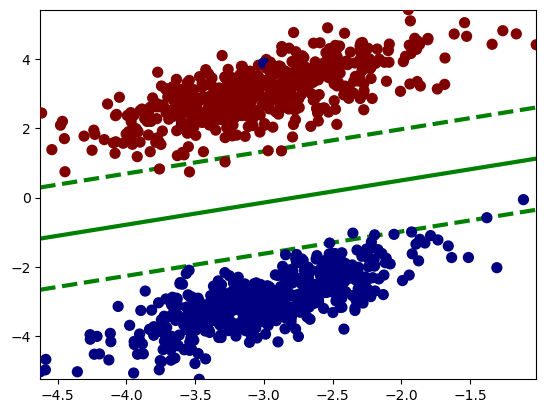

In [54]:
n = 1000
xmin, xmax = X.min(0), X.max(0)
x1r = np.linspace(xmin[0], xmax[0], n)
x2r = np.linspace(xmin[1], xmax[1], n)
x1m, x2m = np.meshgrid(x1r, x2r)

Xm = np.stack((x1m.flatten(), x2m.flatten()), axis=1)
ym = model.decision_function(Xm)
ym = ym.reshape(x1m.shape)

plt.contour(x1m, x2m, ym, levels=[-1, 0, 1], linestyles=['--', '-', '--'], linewidths=3, colors='green')

plt.scatter(X[:, 0], X[:, 1], c=y, cmap='jet', s=50, zorder=3)

### **Non-linear SVC (Kernel Trick)**

In [55]:
from sklearn.svm import SVC, NuSVC

#### Example 1

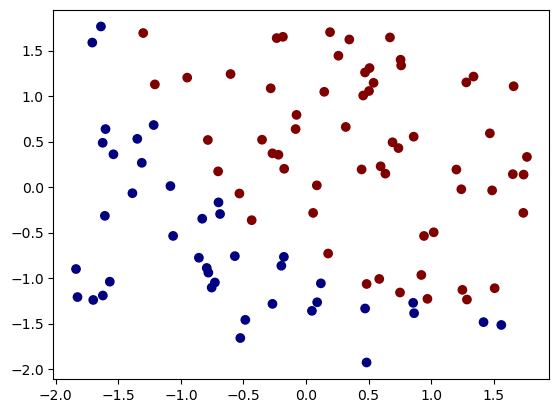

In [56]:
data = np.loadtxt('data/ex2data1.txt', delimiter=',')

X = data[:, :-1].copy()
y = data[:, -1].copy().astype(np.int64)

normz = StandardScaler()
X = normz.fit_transform(X)

plt.scatter(X[:, 0], X[:, 1], c=y, cmap='jet');

In [57]:
model = SVC(C=1., kernel='poly', degree=2, coef0=1)
model.fit(X, y)

SVC(coef0=1, degree=2, kernel='poly')

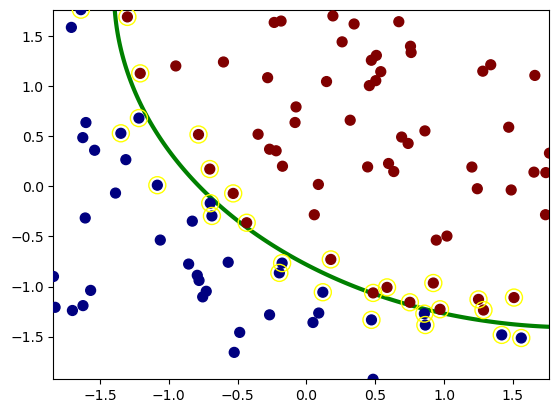

In [58]:
n = 1000
xmin, xmax = X.min(0), X.max(0)
x1r = np.linspace(xmin[0], xmax[0], n)
x2r = np.linspace(xmin[1], xmax[1], n)
x1m, x2m = np.meshgrid(x1r, x2r)

Xm = np.stack((x1m.flatten(), x2m.flatten()), axis=1)
ym = model.decision_function(Xm)
ym = ym.reshape(x1m.shape)

plt.contour(x1m, x2m, ym, levels=[0], linewidths=3, colors='green')

plt.scatter(X[:, 0], X[:, 1], c=y, cmap='jet', s=50, zorder=3)

sv = model.support_vectors_
plt.scatter(sv[:, 0], sv[:, 1], zorder=5, c='none', s=150, edgecolors='yellow')

In [59]:
model.score(X,y)

1.0

#### Example 2

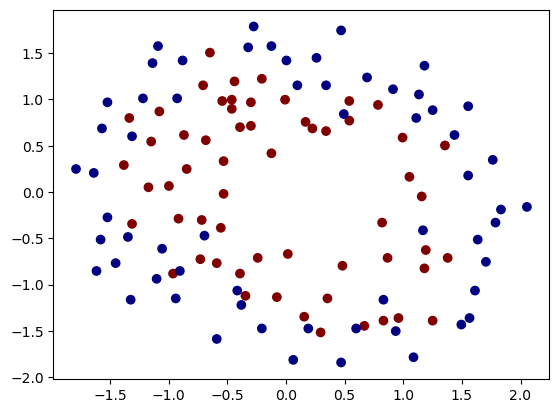

In [60]:
data = np.loadtxt('data/ex2data2.txt', delimiter=',')

X = data[:, :-1].copy()
y = data[:, -1].copy().astype(np.int64)

normz = StandardScaler()
X = normz.fit_transform(X)

plt.scatter(X[:, 0], X[:, 1], c=y, cmap='jet');

In [61]:
model = SVC(C=1.6, kernel='poly', degree=2, coef0=1)
model.fit(X, y)

SVC(C=1.6, coef0=1, degree=2, kernel='poly')

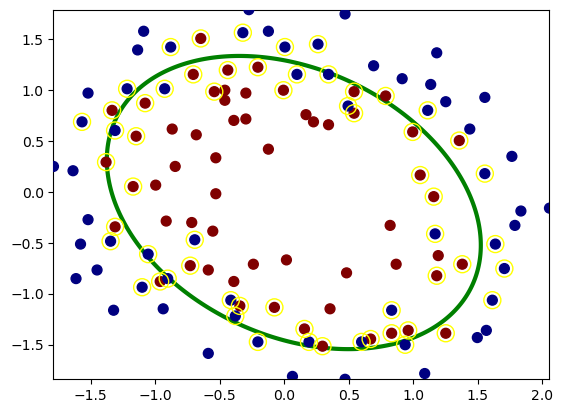

In [62]:
n = 1000
xmin, xmax = X.min(0), X.max(0)
x1r = np.linspace(xmin[0], xmax[0], n)
x2r = np.linspace(xmin[1], xmax[1], n)
x1m, x2m = np.meshgrid(x1r, x2r)

Xm = np.stack((x1m.flatten(), x2m.flatten()), axis=1)
ym = model.decision_function(Xm)
ym = ym.reshape(x1m.shape)

plt.contour(x1m, x2m, ym, levels=[0], linewidths=3, colors='green')

plt.scatter(X[:, 0], X[:, 1], c=y, cmap='jet', s=50, zorder=3)

sv = model.support_vectors_
plt.scatter(sv[:, 0], sv[:, 1], zorder=5, c='none', s=150, edgecolors='yellow')

In [63]:
model.score(X, y)

0.8220338983050848